In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db')

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2)

07/22/2019 14:37:55 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/22/2019 14:37:56 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/22/2019 14:37:57 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/22/2019 14:37:57 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

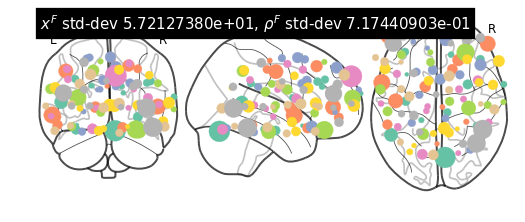

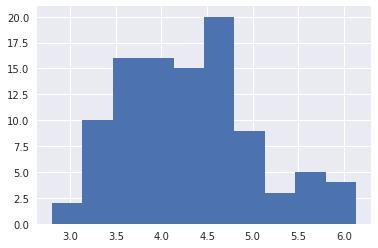

(<nilearn.plotting.displays.OrthoProjector at 0x7ff6bcf1b940>,
 tensor([[  9.7729, -24.9462, -20.0209],
         [-34.8084,  38.7281,  32.1577],
         [-17.6280, -33.1094,  25.2195],
         [ 44.4939,  30.9702,  29.9463],
         [-49.5171, -48.6540,   7.9469],
         [ 40.5730, -39.1940,  28.1017],
         [ 31.0744,   4.4617,  -7.7998],
         [ 15.8103,  76.4065,  17.5670],
         [-32.9621,  14.9873, -16.3870],
         [-34.0302, -13.0909, -21.3949],
         [  7.2408, -72.3403, -22.3206],
         [ 13.6194,  35.7439,  24.8051],
         [ 69.1468,   4.5795,  13.4351],
         [ 21.3218,  29.9883,  46.2671],
         [ 52.1596,  47.2363,   3.1855],
         [-44.7202, -12.8590,  40.5069],
         [-54.6228,  53.2815,  -7.7466],
         [ -1.1389, -58.0157,  24.6192],
         [  4.5437, -19.3409,  52.1055],
         [ 29.6634, -34.8654,   4.6931],
         [-53.3400, -37.7781, -15.9963],
         [-13.5549,   2.1823,   2.5115],
         [ 30.9550, -22.1895,  42.8

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=60, patience=100)

07/22/2019 14:40:04 [Epoch 1] (59101ms) Posterior free-energy 1.74201088e+08 = KL from prior 2.27984900e+06 - log-likelihood -1.71921200e+08
07/22/2019 14:40:04 Saving checkpoint...
07/22/2019 14:41:04 [Epoch 2] (60099ms) Posterior free-energy 1.58124560e+08 = KL from prior 2.19366725e+06 - log-likelihood -1.55930896e+08
07/22/2019 14:42:05 [Epoch 3] (60301ms) Posterior free-energy 1.52648288e+08 = KL from prior 2.14563600e+06 - log-likelihood -1.50502704e+08
07/22/2019 14:43:03 [Epoch 4] (58404ms) Posterior free-energy 1.50153104e+08 = KL from prior 2.10278125e+06 - log-likelihood -1.48050352e+08
07/22/2019 14:44:01 [Epoch 5] (57260ms) Posterior free-energy 1.48689824e+08 = KL from prior 2.04445638e+06 - log-likelihood -1.46645376e+08
07/22/2019 14:44:57 [Epoch 6] (56604ms) Posterior free-energy 1.47741888e+08 = KL from prior 1.97973125e+06 - log-likelihood -1.45762160e+08
07/22/2019 14:45:54 [Epoch 7] (57140ms) Posterior free-energy 1.47094304e+08 = KL from prior 1.89807000e+06 - log

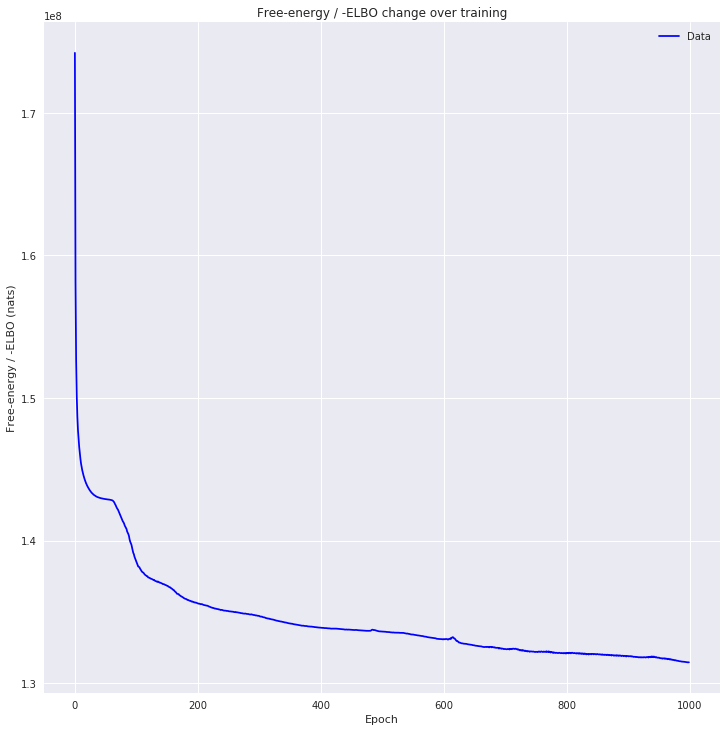

In [9]:
utils.plot_losses(losses)

In [10]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

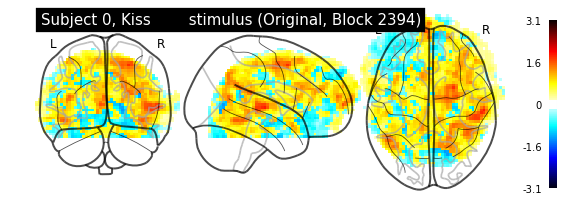

07/23/2019 06:19:43 Reconstruction Error (Frobenius Norm): 7.77013245e+01 out of 8.91041641e+01


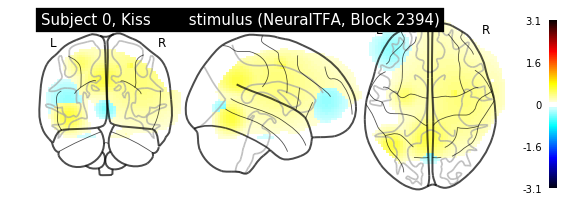

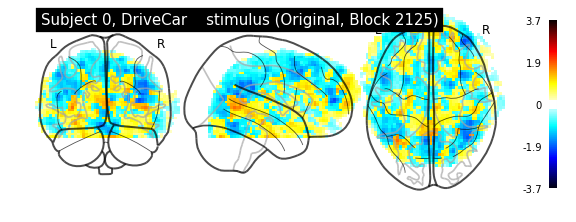

07/23/2019 06:19:46 Reconstruction Error (Frobenius Norm): 8.96748657e+01 out of 9.75132446e+01


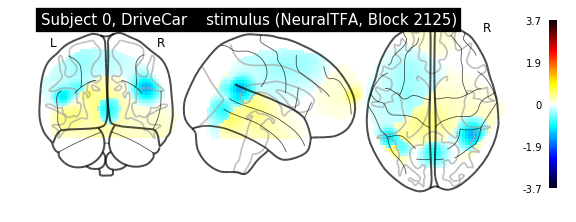

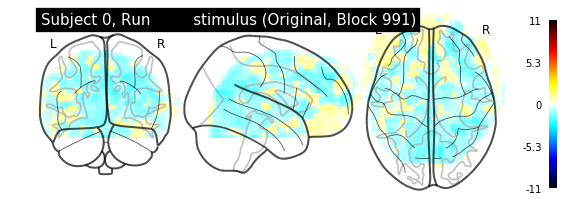

07/23/2019 06:19:48 Reconstruction Error (Frobenius Norm): 8.83876038e+01 out of 1.00743126e+02


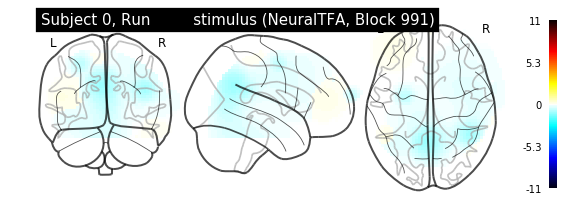

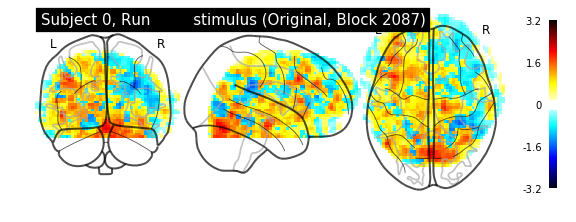

07/23/2019 06:19:50 Reconstruction Error (Frobenius Norm): 9.00594025e+01 out of 9.89688568e+01


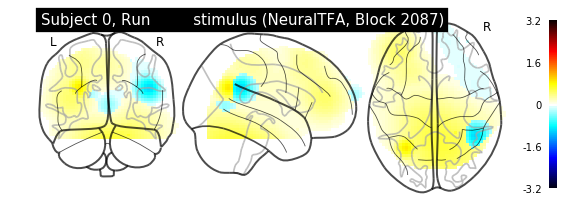

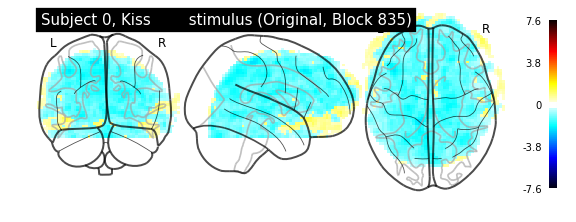

07/23/2019 06:19:52 Reconstruction Error (Frobenius Norm): 9.43830643e+01 out of 1.39402115e+02


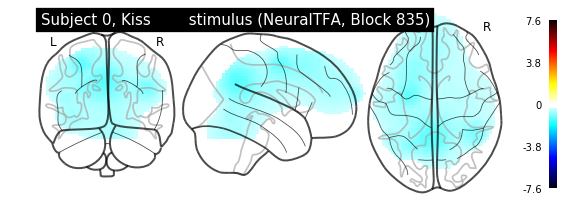

In [11]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [12]:
def task_labeler(task):
    return task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


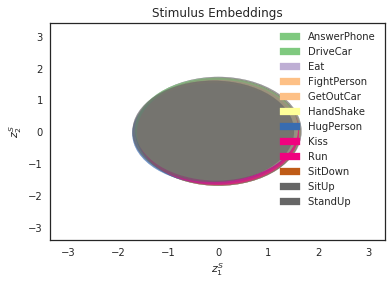

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


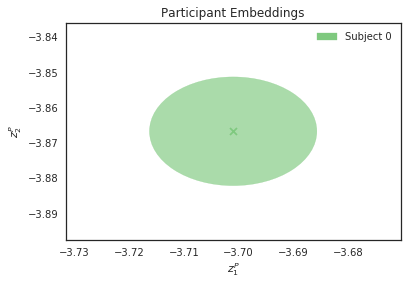

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

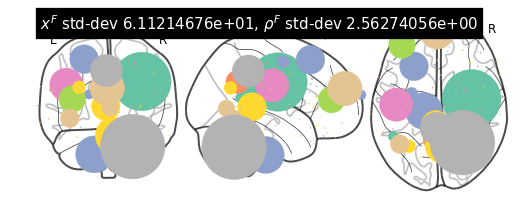

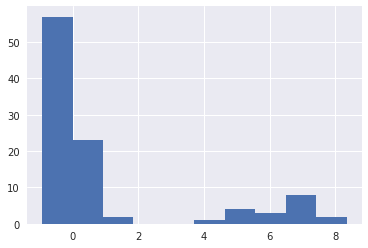

(<nilearn.plotting.displays.OrthoProjector at 0x7ff6b021de10>,
 tensor([[ 15.9065, -27.7425, -25.4957],
         [-38.7778,  44.8796,  35.1807],
         [-12.6675, -42.9729,  31.4872],
         [ 41.5677,  23.5516,  27.2923],
         [-47.0507, -50.1517,  12.8467],
         [ 44.6061, -47.0026,  22.3227],
         [ 26.4183,   2.8124,  -5.3868],
         [ 24.1467,  99.4827,  30.5625],
         [-29.3079,  23.4316, -18.6207],
         [-36.6091, -13.4042, -16.1911],
         [ 35.2593, -10.7176,  29.5278],
         [ -5.1001,  39.7437,  27.6814],
         [ 60.5301,  22.6057,  18.6374],
         [ 21.7118,   5.3382,  52.1666],
         [ 53.7728,  62.5990,  13.8078],
         [-39.0727, -13.8540,  44.5364],
         [-71.0582,  56.5891, -13.8509],
         [ -3.6039, -53.2773,  29.7683],
         [  1.9392, -22.8313,  49.1045],
         [ 26.8391, -32.1424,   2.8274],
         [-58.0415, -45.6629, -19.5808],
         [ -6.0059,   1.0509,   3.1465],
         [ 32.7679, -24.5086,  40.8

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

07/23/2019 06:21:55 Average reconstruction error (MSE): 4.15424950e-01
07/23/2019 06:21:55 Average data norm (Euclidean): 4.98781199e-01
07/23/2019 06:21:55 Percent average reconstruction error: 0.390054


(0.41542494998737406, 0.49878119884164446, 0.0039005405737354846)

In [18]:
dtfa.average_reconstruction_error(weighted=False)

07/23/2019 06:23:57 Average reconstruction error (MSE): 9.04794211e+01 +/- 1.46303881e+01
07/23/2019 06:23:57 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
07/23/2019 06:23:57 Percent average reconstruction error: 85.688948 +/- 7.95162942e+00


(array([95.60777283, 78.02073669, 87.79747009, ..., 86.17440033,
        74.14324951, 79.70657349]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.94748464, 0.94922781, 0.92759919, ..., 0.87740532, 0.88400139,
        0.85644312]))